In [1]:
import pandas as pd
from ipywidgets import interact, interactive, fixed, interact_manual
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from numba import jit

import statsmodels.api as sm


from tsfresh import extract_features,select_features
%matplotlib inline

/home/tronco/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [5]:
# Loading data
files = ["canela1.csv", "canela2.csv", "monte_redondo.csv"]
file = files[0]
data = pd.read_csv('../../data/'+file, names=["t","potency"],index_col="t")                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
data.index=pd.to_datetime(data.index)
print("FILE: ", file)


FILE:  canela1.csv


# Normal data

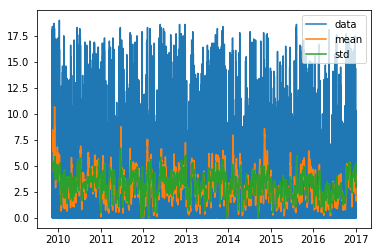

In [6]:
mean = data.rolling(window=200,center=False).mean()
std = data.rolling(window=200,center=False).std()

plt.plot(data)
plt.plot(mean)
plt.plot(std)
plt.legend(["data","mean", "std"])

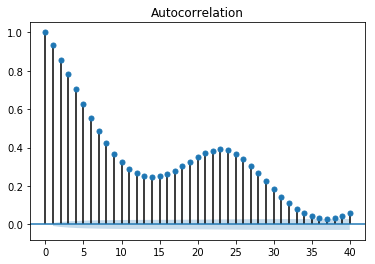

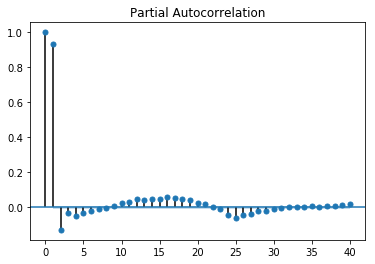

In [7]:
sm.graphics.tsa.plot_acf(data, lags=40)
sm.graphics.tsa.plot_pacf(data,lags=40)
print()

# Log Data

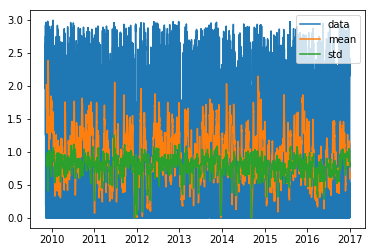

In [8]:
log_data = np.log(data+1)
mean = log_data.rolling(window=200,center=False).mean()
std = log_data.rolling(window=200,center=False).std()

plt.plot(log_data)
plt.plot(mean)
plt.plot(std)
plt.legend(["data","mean", "std"])

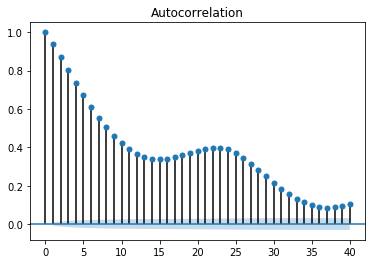

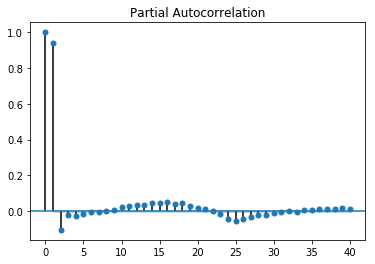

In [9]:
sm.graphics.tsa.plot_acf(log_data, lags=40)
sm.graphics.tsa.plot_pacf(log_data,lags=40)
print()

# Diff Data

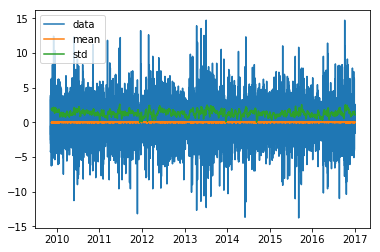

In [10]:
diff_data = pd.DataFrame(np.diff(data,axis=0))
diff_data.index = data.index[:-1]
mean = diff_data.rolling(window=200,center=False).mean()
std = diff_data.rolling(window=200,center=False).std()

plt.plot(diff_data)
plt.plot(mean)
plt.plot(std)
plt.legend(["data","mean", "std"])

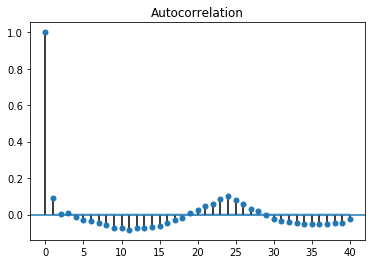

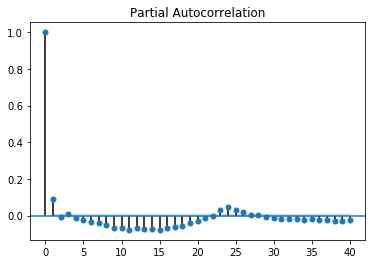

In [11]:
sm.graphics.tsa.plot_acf(diff_data, lags=40)
sm.graphics.tsa.plot_pacf(diff_data,lags=40)
print()

# Diff log data

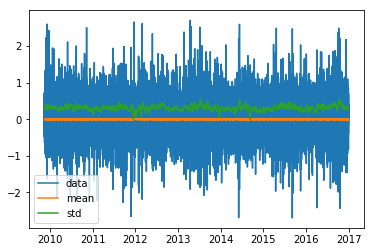

In [12]:
diff_log = pd.DataFrame(np.diff(np.log(data+1),axis=0))
diff_log.index = data.index[:-1]
mean = diff_log.rolling(window=200,center=False).mean()
std = diff_log.rolling(window=200,center=False).std()

plt.plot(diff_log)
plt.plot(mean)
plt.plot(std)
plt.legend(["data","mean", "std"])

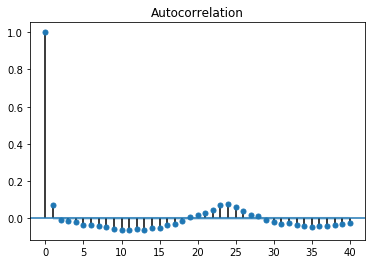

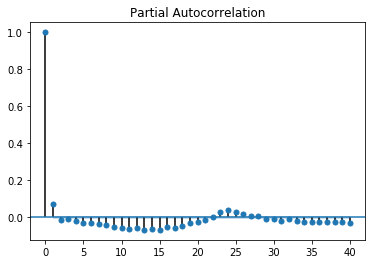

In [13]:
sm.graphics.tsa.plot_acf(diff_log,lags=40)
sm.graphics.tsa.plot_pacf(diff_log,lags=40)
print()

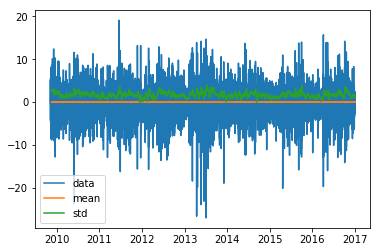

In [14]:
data_2_diff = pd.DataFrame(np.diff(np.diff(data,axis=0),axis=0))
data_2_diff.index = data.index[:-2]
mean = data_2_diff.rolling(window=200,center=False).mean()
std = data_2_diff.rolling(window=200,center=False).std()

plt.plot(data_2_diff)
plt.plot(mean)
plt.plot(std)
plt.legend(["data","mean", "std"])

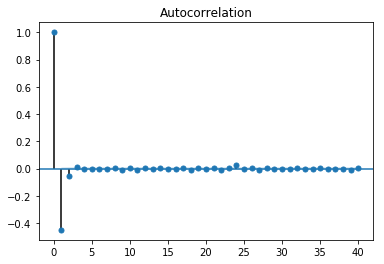

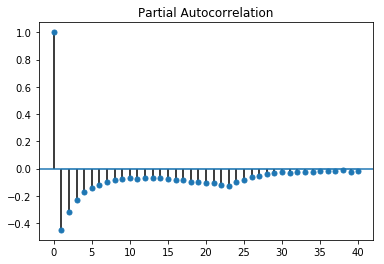

In [15]:
sm.graphics.tsa.plot_acf(data_2_diff,lags=40)
sm.graphics.tsa.plot_pacf(data_2_diff,lags=40)
print()